In [1]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Load dataset (Iris)
def import_csv (file):
    import pandas as pd
    return pd.read_csv (file)

In [3]:
# Path to the file to be imported
sed = "sedimentology.csv"

# Import the file and convert to a dataframe
sed_df = import_csv(sed)
parameters = sed_df[['mean', 'sorting','skewness', 'kurtosis']]
dune = sed_df['dune_site']
X = parameters      
y = dune   

In [4]:
# 3. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
# 4. Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
# 5. Make predictions
y_pred = lda.predict(X_test)

In [7]:
# 6. Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6521739130434783

Confusion Matrix:
 [[3 1 1]
 [0 8 2]
 [0 4 4]]

Classification Report:
               precision    recall  f1-score   support

          CB       1.00      0.60      0.75         5
          CH       0.62      0.80      0.70        10
          PA       0.57      0.50      0.53         8

    accuracy                           0.65        23
   macro avg       0.73      0.63      0.66        23
weighted avg       0.68      0.65      0.65        23



In [16]:
import pandas as pd
def lda_loadings(lda_model, feature_names):
    """
    Create a table showing how much each variable contributes
    to each discriminant axis in LDA.
    
    Parameters
    ----------
    lda_model : trained LinearDiscriminantAnalysis object
    feature_names : list of feature names (strings)
    
    Returns
    -------
    loadings_df : pandas DataFrame with variable contributions
    """
    # Loadings (scalings) tell us how original features map to discriminant axes
    loadings = lda_model.scalings_

    # Number of discriminant axes
    n_axes = loadings.shape[1]

    # Create axis labels: LD1, LD2, ...
    axis_labels = [f"LD{i+1}" for i in range(n_axes)]

    # Build DataFrame
    loadings_df = pd.DataFrame(loadings, 
                               index=feature_names, 
                               columns=axis_labels)
    
    # Add absolute values for easier ranking
    loadings_df["Max_Abs_Loading"] = loadings_df.abs().max(axis=1)
    loadings_df = loadings_df.sort_values("Max_Abs_Loading", ascending=False)

    return loadings_df


In [17]:
feature_names = ['mean', 'sorting','skewness', 'kurtosis']

loadings_table = lda_loadings(lda, feature_names)
print(loadings_table)

                LD1       LD2  Max_Abs_Loading
sorting  -13.238795 -0.906691        13.238795
kurtosis  -9.134709  4.425924         9.134709
skewness  -2.524674 -5.621444         5.621444
mean      -0.573579 -1.877429         1.877429


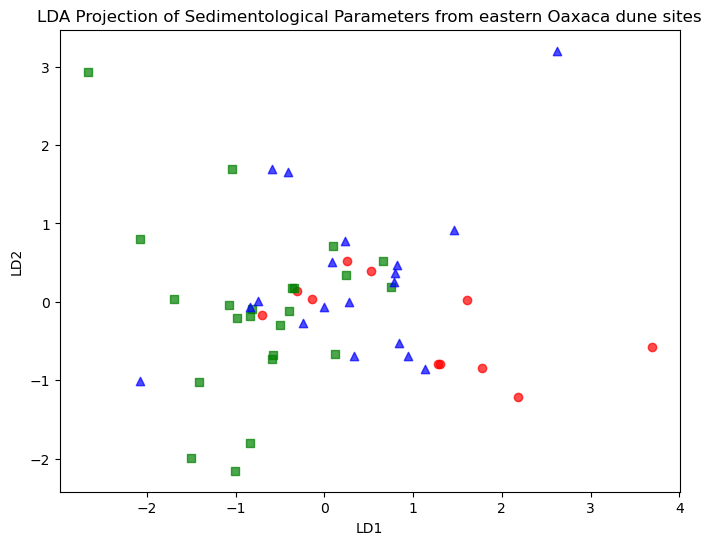

In [12]:
# 7. Visualize the LDA transformation (projecting to 2D)
X_lda = lda.transform(X_train)

plt.figure(figsize=(8,6))
for label, marker, color in zip(np.unique(y_train), ('o', 's', '^'), ('red', 'green', 'blue')):
    plt.scatter(
        X_lda[y_train == label, 0],   # First discriminant axis
        X_lda[y_train == label, 1],   # Second discriminant axis
        label=sed_df['dune_site'],
        marker=marker,
        color=color,
        alpha=0.7
    )

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection of Sedimentological Parameters from eastern Oaxaca dune sites")
#plt.legend()
plt.show()